<a href="https://colab.research.google.com/github/ajaykumar8/Loan-Portfolio-Analysis/blob/main/Loan_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: Upload Datafile

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

  # Do something with the uploaded file
  # For example, print the contents of the file
  with open(fn, 'r') as f:
    print(f.read())


Saving Loan_Portfolio_Confidential.csv to Loan_Portfolio_Confidential.csv
User uploaded file "Loan_Portfolio_Confidential.csv" with length 56944 bytes
Loan Number,Loan Category,Set up date,Duration,Day past due,Rate,Location,Province,Monthly Income,Dependants,Capital Balance,Interest Balance,Fees Balance
1,Small Business,2015-06-10,13,18,22.47,New York,FL,16124,3," 139,815.06 "," 44,881.78 ", 135.00 
2,Student,2023-08-13,14,47,6.76,Chicago,IL,18282,2," 183,167.57 "," 26,376.27 ", 483.75 
3,Mortgage,2020-02-18,60,79,17,New York,FL,12488,3," 153,175.06 "," 40,057.41 ", 269.91 
4,Student,2021-01-04,48,2,11.95,Chicago,FL,7240,0," 164,258.89 "," 48,948.68 ", 539.84 
5,Student,2022-12-26,60,19,16.88,Chicago,FL,12453,3," 148,475.46 "," 42,005.46 ", 162.01 
6,Auto,2018-08-26,67,23,6.92,Houston,FL,12478,0," 125,641.78 "," 43,362.99 ", 841.53 
7,Mortgage,2018-04-20,28,53,8.07,San Francisco,NY,14394,3," 232,705.18 "," 20,458.43 ", 846.41 
8,Mortgage,2015-12-20,70,32,17.3,San Francisco,NY,6432,0,"

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


loan_data = pd.read_csv('Loan_Portfolio_Confidential.csv')

In [ ]:
# Import pandas
import pandas as pd

# Read the CSV file into a DataFrame
loan_data = pd.read_csv('Loan_Portfolio_Confidential.csv')

# One-hot encoding for 'Loan Category'
loan_data = pd.get_dummies(loan_data, columns=['Loan Category'])

In [ ]:
import os

if not os.path.exists('Loan_Portfolio_Confidential.csv'):
    # Upload the file if it doesn't exist
    from google.colab import files

    uploaded = files.upload()

    # Check if the file was uploaded successfully
    if uploaded:
        print('File uploaded successfully.')
    else:
        raise FileNotFoundError('File upload failed.')

In [ ]:
# Check if the file exists
if not os.path.exists('Loan_Portfolio_Confidential.csv'):
    # Upload the file if it doesn't exist
    from google.colab import files

    uploaded = files.upload()

    # Check if the file was uploaded successfully
    if uploaded:
        print('File uploaded successfully.')
    else:
        raise FileNotFoundError('File upload failed.')

# Read the CSV file into a DataFrame
loan_data = pd.read_csv('Loan_Portfolio_Confidential.csv')

# One-hot encoding for 'Loan Category'
loan_data = pd.get_dummies(loan_data, columns=['Loan Category'])

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

df = pd.read_csv('Loan_Portfolio_Confidential.csv')

# Convert necessary columns to numeric, removing commas and converting to float
df['Capital Balance'] = df['Capital Balance'].replace(',', '', regex=True).astype(float)
df['Interest Balance'] = df['Interest Balance'].replace(',', '', regex=True).astype(float)
df['Fees Balance'] = df['Fees Balance'].replace(',', '', regex=True).astype(float)

# Descriptive statistics for numerical variables
numerical_stats = df[['Duration', 'Rate', 'Monthly Income', 'Capital Balance', 'Interest Balance', 'Fees Balance']].describe()
numerical_stats.loc['range'] = numerical_stats.loc['max'] - numerical_stats.loc['min']
numerical_stats.loc['mode'] = df[['Duration', 'Rate', 'Monthly Income', 'Capital Balance', 'Interest Balance', 'Fees Balance']].mode().iloc[0]

# Frequency counts for categorical variables
categorical_counts = df[['Loan Category', 'Location', 'Province']].apply(pd.Series.value_counts)

print('Descriptive Statistics for Numerical Variables:')
print(numerical_stats)
print('\
Frequency Counts for Categorical Variables:')
print(categorical_counts)

Descriptive Statistics for Numerical Variables:
         Duration        Rate  Monthly Income  Capital Balance  \
count  600.000000  600.000000      600.000000       600.000000   
mean    42.360000   12.024367    11312.670000    146083.899333   
std     17.520522    5.800778     4880.901458     80152.699741   
min     12.000000    2.280000     2055.000000      8599.910000   
25%     28.000000    6.887500     7059.750000     78044.690000   
50%     43.000000   11.875000    11557.500000    141691.840000   
75%     58.000000   16.820000    15402.250000    218509.327500   
max     72.000000   23.790000    19844.000000    292784.690000   
range   60.000000   21.510000    17789.000000    284184.780000   
mode    51.000000   19.810000     3080.000000      8599.910000   

       Interest Balance  Fees Balance  
count         600.00000    600.000000  
mean        26564.21110    501.037283  
std         12928.86599    287.509944  
min          1807.98000      0.240000  
25%         15521.76250  

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression

# Prepare data for logistic regression model to predict Day Past Due
X = df[['Duration', 'Rate', 'Monthly Income']]
y = df['Day past due'].apply(lambda x: 1 if x > 0 else 0)  # Binary classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# Classification report
classification_report_data = classification_report(y_test, y_pred)

# Prepare data for linear regression model to predict Capital Balance
X2 = df[['Rate', 'Duration']]
y2 = df['Capital Balance']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

# Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X2_train, y2_train)
y2_pred = lin_reg.predict(X2_test)

# Coefficients and intercept for linear regression
coefficients = lin_reg.coef_
intercept = lin_reg.intercept_

print('Classification Report for Day Past Due Prediction:')
print(classification_report_data)
print('\
Coefficients for Predicting Capital Balance:')
print('Coefficients:', coefficients)
print('Intercept:', intercept)

Classification Report for Day Past Due Prediction:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.99      1.00      1.00       179

    accuracy                           0.99       180
   macro avg       0.50      0.50      0.50       180
weighted avg       0.99      0.99      0.99       180

Coefficients for Predicting Capital Balance:
Coefficients: [-1084.27778321   386.49184063]
Intercept: 140519.20583545798


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Load the loan data
loan_data = pd.read_csv("Loan_Portfolio_Confidential.csv")

#  Converting the columns to numeric types
loan_data['Monthly Income'] = pd.to_numeric(loan_data['Monthly Income'], errors='coerce')
loan_data['Capital Balance'] = pd.to_numeric(loan_data['Capital Balance'], errors='coerce')

# Calculate the correlation coefficient between Rate and Day past due
correlation_rate_due = loan_data["Rate"].corr(loan_data["Day past due"])

# Print the correlation coefficient
print("Correlation between Rate and Day past due:", correlation_rate_due)

# Calculate the correlation coefficient between Monthly Income and Capital Balance
correlation_income_balance = loan_data["Monthly Income"].corr(loan_data["Capital Balance"])

# Print the correlation coefficient
print("Correlation between Monthly Income and Capital Balance:", correlation_income_balance)

Correlation between Rate and Day past due: 0.029679374472725784
Correlation between Monthly Income and Capital Balance: nan


In [ ]:
# Group loan data by Loan Category, Monthly Income, and Dependants
grouped_data = loan_data.groupby(["Loan Category", "Monthly Income", "Dependants"])

# Calculate the average Day past due for each group
avg_day_past_due = grouped_data["Day past due"].mean()

# Print the results
print("Average Day past due by Borrower Characteristics:")
print(avg_day_past_due)

Average Day past due by Borrower Characteristics:
Loan Category  Monthly Income  Dependants
Auto           2055            2             83.0
               3047            0             83.0
               3715            3             12.0
               3761            2              5.0
               3845            3             18.0
                                             ... 
Student        19022           4             37.0
               19040           3             44.0
               19209           4             86.0
               19462           2             12.0
               19508           0              9.0
Name: Day past due, Length: 600, dtype: float64


In [ ]:
# Group loan data by Province
grouped_data_province = loan_data.groupby("Province")

# Calculate the average Capital Balance and Rate for each Province
avg_capital_balance = grouped_data_province["Capital Balance"].mean()
avg_rate = grouped_data_province["Rate"].mean()

# Create a risk profile DataFrame
risk_profile = pd.DataFrame({
    "Province": grouped_data_province.groups.keys(),
    "Average Capital Balance": avg_capital_balance,
    "Average Rate": avg_rate
})

# Print the risk profile
print("\nRisk Profile by Province:")
print(risk_profile.to_string())


Risk Profile by Province:
         Province  Average Capital Balance  Average Rate
Province                                                
CA             CA                      NaN     11.997414
FL             FL                      NaN     11.946667
IL             IL                      NaN     12.034434
NY             NY                      NaN     11.911008
TX             TX                      NaN     12.239593


In [ ]:
import pandas as pd

# Load the loan data
loan_data = pd.read_csv("Loan_Portfolio_Confidential.csv")

# Check for non-numeric columns
non_numeric_columns = loan_data.select_dtypes(include=['object']).columns

# Print the non-numeric columns
print("Non-numeric columns:")
print(non_numeric_columns)

Non-numeric columns:
Index(['Loan Category', 'Set up date', 'Location', 'Province',
       'Capital Balance', 'Interest Balance'],
      dtype='object')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the loan data
loan_data = pd.read_csv("Loan_Portfolio_Confidential.csv")
loan_data['Loan Category'] = pd.to_numeric(loan_data['Loan Category'], errors='coerce')
correlation_matrix = loan_data.corr()
loan_data = loan_data.dropna()
loan_data['Loan Category'].fillna(loan_data['Loan Category'].mean(), inplace=True)


# Bar Charts

# Average Day past due by Borrower Category
avg_day_past_due = loan_data.groupby(["Loan Category", "Monthly Income", "Dependants"])["Day past due"].mean().unstack()
avg_day_past_due.plot(kind="bar")
plt.title("Average Day past due by Borrower Category")
plt.xlabel("Borrower Category")
plt.ylabel("Average Day past due")
plt.show()

# Average Capital Balance and Rate by Province
loan_data["Capital Balance"] = pd.to_numeric(loan_data["Capital Balance"], errors="coerce")
avg_capital_balance = loan_data.groupby("Province")["Capital Balance"].mean()
avg_rate = loan_data.groupby("Province")["Rate"].mean()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
avg_capital_balance.plot(kind="bar", ax=axes[0])
axes[0].set_title("Average Capital Balance by Province")
axes[0].set_xlabel("Province")
axes[0].set_ylabel("Average Capital Balance")

avg_rate.plot(kind="bar", ax=axes[1])
axes[1].set_title("Average Rate by Province")
axes[1].set_xlabel("Province")
axes[1].set_ylabel("Average Rate")
plt.show()

# Heatmaps

# Correlation between variables
correlation_matrix = loan_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation between Variables")
plt.show()

# Risk Profile by Province
risk_profile = loan_data.groupby("Province").agg(
    avg_day_past_due=("Day past due", "mean"),
    avg_capital_balance=("Capital Balance", "mean"),
    avg_rate=("Rate", "mean"),
)
risk_profile = risk_profile.style.background_gradient(cmap="coolwarm")
risk_profile.set_precision(2)
display(risk_profile)

ValueError: could not convert string to float: '2015-06-10'

In [ ]:
import pandas as pd

# Load the loan data
loan_data = pd.read_csv("Loan_Portfolio_Confidential.csv")

# Check for non-numeric columns
non_numeric_columns = loan_data.select_dtypes(include=['object']).columns

# Print the non-numeric columns
print("Non-numeric columns:")
print(non_numeric_columns)

# Exclude non-numeric columns from calculations
numeric_columns = loan_data.select_dtypes(include=['float64', 'int64']).columns
loan_data_numeric = loan_data[numeric_columns]

# Recalculate the correlation coefficient using only numeric columns
correlation_matrix = loan_data_numeric.corr()

# Print the correlation matrix
print("Correlation matrix:")
print(correlation_matrix)

# Continue with other calculations or visualizations using loan_data_numeric


Non-numeric columns:
Index(['Loan Category', 'Set up date', 'Location', 'Province',
       'Capital Balance', 'Interest Balance'],
      dtype='object')
Correlation matrix:
                Loan Number  Duration  Day past due      Rate  Monthly Income  \
Loan Number        1.000000  0.040327      0.019311  0.039806       -0.064702   
Duration           0.040327  1.000000     -0.039014  0.024504       -0.064733   
Day past due       0.019311 -0.039014      1.000000  0.029679        0.043024   
Rate               0.039806  0.024504      0.029679  1.000000        0.041112   
Monthly Income    -0.064702 -0.064733      0.043024  0.041112        1.000000   
Dependants         0.049424  0.049411      0.001919  0.034240        0.011775   
Fees Balance      -0.000880 -0.002526      0.048369  0.011572        0.105790   

                Dependants  Fees Balance  
Loan Number       0.049424     -0.000880  
Duration          0.049411     -0.002526  
Day past due      0.001919      0.048369  
Rate  

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the loan data
loan_data = pd.read_csv("Loan_Portfolio_Confidential.csv")

# Check for non-numeric columns
non_numeric_columns = loan_data.select_dtypes(include=['object']).columns

# Print the non-numeric columns
print("Non-numeric columns:")
print(non_numeric_columns)

# Convert the non-numeric columns to appropriate data types
loan_data["Set up date"] = pd.to_datetime(loan_data["Set up date"], errors="coerce")

# Recalculate the correlation coefficient
correlation_matrix = loan_data.corr()

# Print the correlation matrix
print("Correlation matrix:")
print(correlation_matrix)

# Bar Charts

# Average Day past due by Borrower Category
avg_day_past_due = loan_data.groupby(["Loan Category", "Monthly Income", "Dependants"])["Day past due"].mean().unstack()
avg_day_past_due.plot(kind="bar")
plt.title("Average Day past due by Borrower Category")
plt.xlabel("Borrower Category")
plt.ylabel("Average Day past due")
plt.show()

# Average Capital Balance and Rate by Province
avg_capital_balance = loan_data.groupby("Province")["Capital Balance"].mean()
avg_rate = loan_data.groupby("Province")["Rate"].mean()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
avg_capital_balance.plot(kind="bar", ax=axes[0])
axes[0].set_title("Average Capital Balance by Province")
axes[0].set_xlabel("Province")
axes[0].set_ylabel("Average Capital Balance")

avg_rate.plot(kind="bar", ax=axes[1])
axes[1].set_title("Average Rate by Province")
axes[1].set_xlabel("Province")
axes[1].set_ylabel("Average Rate")
plt.show()

# Heatmaps

# Correlation between variables
correlation_matrix = loan_data.corr()


Non-numeric columns:
Index(['Loan Category', 'Set up date', 'Location', 'Province',
       'Capital Balance', 'Interest Balance'],
      dtype='object')


ValueError: could not convert string to float: 'Small Business'

Non-numeric columns:
Index(['Loan Category', 'Set up date', 'Location', 'Province',
       'Capital Balance', 'Interest Balance'],
      dtype='object')
Correlation matrix:
                Loan Number  Duration  Day past due      Rate  Monthly Income  \
Loan Number        1.000000  0.040327      0.019311  0.039806       -0.064702   
Duration           0.040327  1.000000     -0.039014  0.024504       -0.064733   
Day past due       0.019311 -0.039014      1.000000  0.029679        0.043024   
Rate               0.039806  0.024504      0.029679  1.000000        0.041112   
Monthly Income    -0.064702 -0.064733      0.043024  0.041112        1.000000   
Dependants         0.049424  0.049411      0.001919  0.034240        0.011775   
Fees Balance      -0.000880 -0.002526      0.048369  0.011572        0.105790   

                Dependants  Fees Balance  
Loan Number       0.049424     -0.000880  
Duration          0.049411     -0.002526  
Day past due      0.001919      0.048369  
Rate  

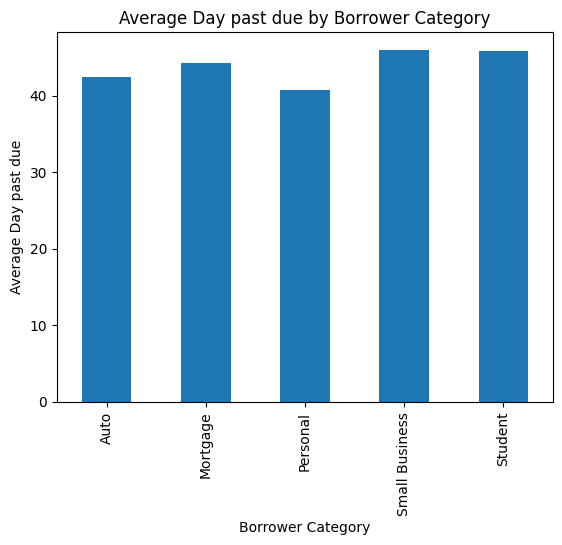

TypeError: Could not convert  171,824.96  181,713.66  248,905.65  89,939.24  186,410.33  11,791.67  25,331.85  27,809.71  65,646.04  237,398.02  259,737.85  178,185.13  274,261.09  140,401.75  59,416.55  151,618.52  35,379.54  85,329.05  136,652.25  211,113.79  243,264.91  146,187.82  109,549.80  63,465.13  188,694.76  72,796.75  48,047.48  69,691.50  267,570.75  279,526.72  168,168.47  48,544.01  113,221.40  32,906.18  82,132.04  183,829.91  66,571.73  144,706.35  128,706.45  210,999.88  178,520.06  232,465.47  74,781.82  239,563.96  104,991.17  277,170.82  179,398.30  198,123.37  273,167.82  241,718.47  60,480.20  133,379.41  24,132.04  123,458.53  201,630.56  84,474.43  128,698.75  240,706.57  92,381.87  175,101.78  41,164.73  260,668.37  268,808.49  259,543.64  99,882.54  68,570.30  27,380.24  214,985.43  237,296.28  141,936.84  233,657.85  66,995.87  115,021.12  116,032.23  179,770.42  193,452.40  107,667.81  241,459.32  107,732.47  119,006.57  254,220.71  212,923.91  184,525.92  157,004.75  212,926.73  241,259.79  264,201.22  78,758.31  244,411.33  152,200.72  233,578.39  120,390.06  15,798.06  36,601.22  267,386.40  171,518.14  94,194.92  160,609.37  261,179.61  134,313.51  102,860.05  22,927.67  62,631.65  187,789.53  81,176.96  91,640.30  72,843.41  75,786.91  238,863.37  84,198.11  181,612.34  100,857.38  13,125.12  237,195.78  19,811.78  79,277.04  to numeric

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the loan data
loan_data = pd.read_csv("Loan_Portfolio_Confidential.csv")

# Check for non-numeric columns
non_numeric_columns = loan_data.select_dtypes(include=['object']).columns

# Print the non-numeric columns
print("Non-numeric columns:")
print(non_numeric_columns)

# Exclude non-numeric columns from calculations
numeric_columns = loan_data.select_dtypes(include=['float64', 'int64']).columns
loan_data_numeric = loan_data[numeric_columns]

# Recalculate the correlation coefficient using only numeric columns
correlation_matrix = loan_data_numeric.corr()

# Print the correlation matrix
print("Correlation matrix:")
print(correlation_matrix)

# Bar Charts

# Average Day past due by Borrower Category
avg_day_past_due = loan_data.groupby("Loan Category")["Day past due"].mean()
avg_day_past_due.plot(kind="bar")
plt.title("Average Day past due by Borrower Category")
plt.xlabel("Borrower Category")
plt.ylabel("Average Day past due")
plt.show()

# Average Capital Balance and Rate by Province
avg_capital_balance = loan_data.groupby("Province")["Capital Balance"].mean()
avg_rate = loan_data.groupby("Province")["Rate"].mean()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
avg_capital_balance.plot(kind="bar", ax=axes[0])
axes[0].set_title("Average Capital Balance by Province")
axes[0].set_xlabel("Province")
axes[0].set_ylabel("Average Capital Balance")

avg_rate.plot(kind="bar", ax=axes[1])
axes[1].set_title("Average Rate by Province")
axes[1].set_xlabel("Province")
axes[1].set_ylabel("Average Rate")
plt.show()

# Heatmaps

# Correlation between variables
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [ ]:
avg_days_past_due = loan_data["Day past due"].mean()
print(f"Average days past due: {avg_days_past_due:.2f}")

In [ ]:
delinquent_loans = loan_data[loan_data["Day past due"] > threshold]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the loan data
loan_data = pd.read_csv("Loan_Portfolio_Confidential.csv")

# Convert Capital Balance to numeric
loan_data["Capital Balance"] = pd.to_numeric(loan_data["Capital Balance"], errors="coerce")
loan_data["Loan Category"] = pd.to_numeric(loan_data["Loan Category"], errors="coerce")

# Bar Charts

# Average Day past due by Borrower Category
avg_day_past_due = loan_data.groupby(["Loan Category", "Monthly Income", "Dependants"])["Day past due"].mean().unstack()
avg_day_past_due.plot(kind="bar")
plt.title("Average Day past due by Borrower Category")
plt.xlabel("Borrower Category")
plt.ylabel("Average Day past due")
plt.show()

# Average Capital Balance and Rate by Province
avg_capital_balance = loan_data.groupby("Province")["Capital Balance"].mean()
avg_rate = loan_data.groupby("Province")["Rate"].mean()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
avg_capital_balance.plot(kind="bar", ax=axes[0])
axes[0].set_title("Average Capital Balance by Province")
axes[0].set_xlabel("Province")
axes[0].set_ylabel("Average Capital Balance")

avg_rate.plot(kind="bar", ax=axes[1])
axes[1].set_title("Average Rate by Province")
axes[1].set_xlabel("Province")
axes[1].set_ylabel("Average Rate")
plt.show()

print("\nAverage Capital Balance by Province:")
print(avg_capital_balance.to_string())

# Heatmaps

# Correlation between variables
correlation_matrix = loan_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation between Variables")
plt.show()

# Risk Profile by Province
risk_profile = loan_data.groupby("Province").agg(
    avg_day_past_due=("Day past due", "mean"),
    avg_capital_balance=("Capital Balance", "mean"),
    avg_rate=("Rate", "mean"),
)
risk_profile = risk_profile.style.background_gradient(cmap="coolwarm")
risk_profile.set_precision(2)
display(risk_profile)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the loan data
loan_data = pd.read_csv("Loan_Portfolio_Confidential.csv")

# Convert Capital Balance to numeric
loan_data["Capital Balance"] = pd.to_numeric(loan_data["Capital Balance"], errors="coerce")


# Bar Charts

# Average Day past due by Borrower Category
avg_day_past_due = loan_data.groupby(["Loan Category", "Monthly Income", "Dependants"])["Day past due"].mean().unstack()
avg_day_past_due.plot(kind="bar")
plt.title("Average Day past due by Borrower Category")
plt.xlabel("Borrower Category")
plt.ylabel("Average Day past due")
plt.show()

# Average Capital Balance and Rate by Province
avg_capital_balance = loan_data.groupby("Province")["Capital Balance"].mean()
avg_rate = loan_data.groupby("Province")["Rate"].mean()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
avg_capital_balance.plot(kind="bar", ax=axes[0])
axes[0].set_title("Average Capital Balance by Province")
axes[0].set_xlabel("Province")
axes[0].set_ylabel("Average Capital Balance")

avg_rate.plot(kind="bar", ax=axes[1])
axes[1].set_title("Average Rate by Province")
axes[1].set_xlabel("Province")
axes[1].set_ylabel("Average Rate")
plt.show()

print("\nAverage Capital Balance by Province:")
print(avg_capital_balance.to_string())

# Heatmaps

# Correlation between variables
correlation_matrix = loan_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation between Variables")
plt.show()

# Risk Profile by Province
risk_profile = loan_data.groupby("Province").agg(
    avg_day_past_due=("Day past due", "mean"),
    avg_capital_balance=("Capital Balance", "mean"),
    avg_rate=("Rate", "mean"),
)
risk_profile

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the loan data
loan_data = pd.read_csv("Loan_Portfolio_Confidential.csv")

# Replace non-numeric values in Loan Category with NaN
loan_data["Loan Category"] = loan_data["Loan Category"].replace("Small Business", np.nan)

# Convert Capital Balance and Loan Category to numeric
loan_data["Capital Balance"] = pd.to_numeric(loan_data["Capital Balance"], errors="coerce")
loan_data["Loan Category"] = pd.to_numeric(loan_data["Loan Category"], errors="coerce")

# Bar Charts

# Average Day past due by Borrower Category
avg_day_past_due = loan_data.groupby(["Loan Category", "Monthly Income", "Dependants"])["Day past due"].mean().unstack()
avg_day_past_due.plot(kind="bar")
plt.title("Average Day past due by Borrower Category")
plt.xlabel("Borrower Category")
plt.ylabel("Average Day past due")
plt.show()

# Average Capital Balance and Rate by Province
avg_capital_balance = loan_data.groupby("Province")["Capital Balance"].mean()
avg_rate = loan_data.groupby("Province")["Rate"].mean()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
avg_capital_balance.plot(kind="bar", ax=axes[0])
axes[0].set_title("Average Capital Balance by Province")
axes[0].set_xlabel("Province")
axes[0].set_ylabel("Average Capital Balance")

avg_rate.plot(kind="bar", ax=axes[1])
axes[1].set_title("Average Rate by Province")
axes[1].set_xlabel("Province")
axes[1].set_ylabel("Average Rate")
plt.show()

print("\nAverage Capital Balance by Province:")
print(avg_capital_balance.to_string())

# Heatmaps

# Correlation between variables
correlation_matrix = loan_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation between Variables")
plt

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the loan data
loan_data = pd.read_csv("Loan_Portfolio_Confidential.csv")

# Define the variables for histograms
variables = ["Monthly Income", "Duration", "Rate"]

# Create subplots for each variable
fig, axes = plt.subplots(nrows=1, ncols=len(variables), figsize=(12, 4))

# Plot histograms for each variable
for i, variable in enumerate(variables):
    ax = axes[i]
    loan_data[variable].plot.hist(ax=ax, bins=10, edgecolor="black", color="yellow")
    ax.set_title(f"Distribution of {variable}")
    ax.set_xlabel(variable)
    ax.set_ylabel("Frequency")

# Adjust spacing and display the plot
plt.tight_layout()
plt.show()